#OPTIMISATIONS DISCRÈTES

## Projet – Knapsack Problem

### Pi-12: n = 100

In [2]:
file_pi12_n100 = "pi-12-100-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [3]:
profits_pi12_n100, weights_pi12_n100 = extract_data(file_pi12_n100)
profits_pi12_n100 = [int(i) for i in profits_pi12_n100]
weights_pi12_n100 = [int(i) for i in weights_pi12_n100]
print(profits_pi12_n100)
print(weights_pi12_n100)

[582, 194, 679, 485, 312, 873, 468, 208, 364, 260, 582, 388, 291, 104, 520, 416, 970, 260, 582, 364, 776, 194, 468, 970, 312, 260, 156, 485, 416, 364, 582, 388, 468, 679, 52, 156, 312, 520, 52, 520, 468, 260, 468, 582, 388, 291, 468, 485, 312, 104, 468, 194, 97, 776, 388, 468, 416, 104, 104, 582, 485, 208, 388, 520, 104, 260, 364, 582, 468, 260, 208, 156, 679, 679, 97, 582, 97, 156, 679, 520, 208, 291, 776, 52, 291, 468, 156, 520, 468, 52, 873, 194, 520, 873, 873, 104, 873, 416, 776, 312]
[582, 194, 679, 485, 396, 873, 594, 264, 462, 330, 582, 388, 291, 132, 660, 528, 970, 330, 582, 462, 776, 194, 594, 970, 396, 330, 198, 485, 528, 462, 582, 388, 594, 679, 66, 198, 396, 660, 66, 660, 594, 330, 594, 582, 388, 291, 594, 485, 396, 132, 594, 194, 97, 776, 388, 594, 528, 132, 132, 582, 485, 264, 388, 660, 132, 330, 462, 582, 594, 330, 264, 198, 679, 679, 97, 582, 97, 198, 679, 660, 264, 291, 776, 66, 291, 594, 198, 660, 594, 66, 873, 194, 660, 873, 873, 132, 873, 528, 776, 396]


In [4]:
def extract_info(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      content_line4 = content[3].split("NB_ITEMS: ")
      nb_items = content_line4[1].split("\n")[0]
      content_line5 = content[4].split("MAX_CAPACITY: ")
      max_capacity = content_line5[1].split("\n")[0]
      max_capacity = int(max_capacity)


  return int(nb_items), int(max_capacity)

In [5]:
nb_items_pi12_n100, max_capacity_pi12_n100 = extract_info(file_pi12_n100)
print(nb_items_pi12_n100)
print(max_capacity_pi12_n100)

100
970


In [6]:
def calculate_profit(
    solution: str,
    profits: list
  ):

  profit = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      profit += int(profits[i])

  return profit

In [7]:
def calculate_weight(
    solution: str,
    weights: list
  ):

  weight = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      weight += int(weights[i])

  return weight

#### Création d'une solution valide (pas forcément optimale):
-->Ajouter des items aléatoirement dans le sac à dos jusqu'à arriver au poids maximal.

In [10]:
import random

def gen_valid_solution(max_capacity, weights, nb_items):
    sol = []  # Liste pour stocker la solution binaire
    current_capacity = 0

    for i in range(nb_items):
        if current_capacity >= max_capacity:
            sol.append("0")  # Si on atteint la limite, on met "0"
        else:
            bit = random.choice(["0", "1"])
            if bit == "1" and current_capacity + weights[i] > max_capacity:
                bit = "0"  # On force un "0" si ajouter 1 dépasse la capacité
            sol.append(bit)
            if bit == "1":
                current_capacity += weights[i]  # Mise à jour du poids

    return "".join(sol)


In [11]:
print("Poids à ne pas dépasser: ",max_capacity_pi12_n100)
a_solution = gen_valid_solution(max_capacity_pi12_n100, weights_pi12_n100, nb_items_pi12_n100)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi12_n100))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi12_n100))

Poids à ne pas dépasser:  970
Une solution valide est:  1100000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Le profit de cette solution est:  880
Le poids total de cette solution est:  908


#### La solution optimale avec un solver

In [12]:
!pip -q install ortools

In [14]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi12_n100, weights_pi12_n100, max_capacity_pi12_n100)

target_profit = best_profit
target_weight = sum(weights_pi12_n100[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
print("Temps d'exécution : ", time2 - time1)

Meilleure solution trouvée : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Meilleur profit : 970.0
Poids atteint : 970
[16]
Temps d'exécution :  0.013298749923706055


In [16]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (en string):", best_solution_str)

Meilleure solution trouvée (en string): 0000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000


#### Métaheuristique 1 - Recuit simulé

In [ ]:
#Méthode de voisinage - Transformation locale (p. 98 du cours)
def generate_single_neighbor(current_solution: str):
    neighbor = list(current_solution)
    index = random.randint(0, len(current_solution) - 1)
    neighbor[index] = '1' if neighbor[index] == '0' else '0'

    return ''.join(neighbor)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def simulated_annealing(
    initial_solution: str,
    max_capacity: int,
    profits: list,
    weights: list,
    temperature: float,
    cooling_rate: float,
):
    current_solution = initial_solution
    current_profit = calculate_profit(current_solution, profits)
    current_weight = calculate_weight(current_solution, weights)

    best_solution = current_solution
    best_profit = current_profit

    iteration = 0

    # Listes pour stocker les valeurs à chaque itération
    profits_list = []
    weights_list = []

    while temperature > 1:
        iteration += 1

        # Générer un voisin valide (ne dépassant pas max_capacity)
        while True:
            neighbor = generate_single_neighbor(current_solution)
            neighbor_profit = calculate_profit(neighbor, profits)
            neighbor_weight = calculate_weight(neighbor, weights)

            if neighbor_weight <= max_capacity:
                break  # On garde ce voisin valide

        delta = neighbor_profit - current_profit

        if delta > 0:
            current_solution = neighbor
            current_profit = neighbor_profit
            if neighbor_profit > best_profit:
                best_solution = neighbor
                best_profit = neighbor_profit
        else:
            probability = np.exp(delta / temperature)
            if random.uniform(0, 1) < probability:
                current_solution = neighbor
                current_profit = neighbor_profit

        # Ajouter les valeurs actuelles de profit et poids dans les listes
        profits_list.append(current_profit)
        weights_list.append(current_weight)

        # Réduction progressive de la température
        temperature *= cooling_rate

    # Tracer l'évolution du profit et du poids
    plt.figure(figsize=(12, 6))

    # Tracer du profit au fil des itérations
    plt.subplot(1, 2, 1)
    plt.plot(profits_list, label='Profit', color='blue')
    plt.title('Évolution du profit au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Profit')
    plt.grid(True)

    # Tracer du poids au fil des itérations
    plt.subplot(1, 2, 2)
    plt.plot(weights_list, label='Poids', color='red')
    plt.title('Évolution du poids au fil des itérations')
    plt.xlabel('Itérations')
    plt.ylabel('Poids')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return best_solution, best_profit, iteration


In [20]:
# Test de notre fonction de recuit simulé

print("Poids à ne pas dépasser:", max_capacity_pi12_n100)
initial_solution = gen_valid_solution(max_capacity_pi12_n100, weights_pi12_n100, nb_items_pi12_n100)

print("Solution initiale choisie aléatoirement: ",initial_solution)
print("Son profit actuel:",calculate_profit(initial_solution, profits_pi12_n100))
print("Son poids actuel:",calculate_weight(initial_solution, weights_pi12_n100))
print()

temperature = 1000
cooling_rate = 0.95

best_sol, best_prof, iterations = simulated_annealing(initial_solution, max_capacity_pi12_n100, profits_pi12_n100, weights_pi12_n100, temperature, cooling_rate)
print("Meilleure solution trouvée :", best_sol)
print("Meilleur profit :", best_prof)
print("Poids atteind :", calculate_weight(best_sol, weights_pi12_n100))
print(f"Solution trouvée en {iterations} itérations")


Poids à ne pas dépasser: 970
Solution initiale choisie aléatoirement:  0001100000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000
Son profit actuel: 849
Son poids actuel: 947

Meilleure solution trouvée : 0001100000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000
Meilleur profit : 849
Poids atteind : 947
Solution trouvée en 135 itérations


#### Tests


In [ ]:
import pandas as pd
import time

def test_recuit_simule(temperature, cooling_rate, max_capacity, profits, weights, nb_items):
    results = []

    # Générer une solution initiale valide
    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
    initial_profit = calculate_profit(initial_solution, profits)
    initial_weight = calculate_weight(initial_solution, weights)

    # Démarrer le chronomètre
    start_time = time.time()

    # Appliquer le recuit simulé
    best_solution, best_profit, iterations = simulated_annealing(
        initial_solution, max_capacity, profits, weights, temperature, cooling_rate
    )

    # Arrêter le chronomètre
    end_time = time.time()
    execution_time = end_time - start_time  # Temps en secondes

    best_weight = calculate_weight(best_solution, weights)
    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

    # Enregistrement des résultats
    results.append({
        "Solution initiale": initial_solution,
        "Profit initial": initial_profit,
        "Poids initial": initial_weight,
        "Temperature": temperature,
        "Cooling Rate": cooling_rate,
        "Nouvelle solution": best_solution,
        "Nouveau profit": best_profit,
        "Nouveau Poids": best_weight,
        "Nb Itérations": iterations,
        "Nb objets": nb_objects,
        "Temps (s)": execution_time
    })

    # Convertir en DataFrame pandas
    df = pd.DataFrame(results)

    return df

In [ ]:
# Fixer un interval pour les paramètres
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n100, profits_pi12_n100, weights_pi12_n100, nb_items_pi12_n100)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n100}_12.csv", index=False)


Temp 100
Cooling rate 0.85
Temp 100
Cooling rate 0.86
Temp 100
Cooling rate 0.87
Temp 100
Cooling rate 0.88
Temp 100
Cooling rate 0.89
Temp 100
Cooling rate 0.9
Temp 100
Cooling rate 0.91
Temp 100
Cooling rate 0.92
Temp 100
Cooling rate 0.93
Temp 100
Cooling rate 0.94
Temp 100
Cooling rate 0.95
Temp 100
Cooling rate 0.96
Temp 100
Cooling rate 0.97
Temp 100
Cooling rate 0.98
Temp 100
Cooling rate 0.99
Temp 200
Cooling rate 0.85
Temp 200
Cooling rate 0.86
Temp 200
Cooling rate 0.87
Temp 200
Cooling rate 0.88
Temp 200
Cooling rate 0.89
Temp 200
Cooling rate 0.9
Temp 200
Cooling rate 0.91
Temp 200
Cooling rate 0.92
Temp 200
Cooling rate 0.93
Temp 200
Cooling rate 0.94
Temp 200
Cooling rate 0.95
Temp 200
Cooling rate 0.96
Temp 200
Cooling rate 0.97
Temp 200
Cooling rate 0.98
Temp 200
Cooling rate 0.99
Temp 500
Cooling rate 0.85
Temp 500
Cooling rate 0.86
Temp 500
Cooling rate 0.87
Temp 500
Cooling rate 0.88
Temp 500
Cooling rate 0.89
Temp 500
Cooling rate 0.9
Temp 500
Cooling rate 0.91
Temp

#### Graphiques

In [27]:
!pip install -q matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [ ]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [30]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: np.int64(970), 200: np.int64(970), 500: np.int64(970), 700: np.int64(970), 1000: np.int64(970), 2000: np.int64(970), 5000: np.int64(970), 7000: np.int64(970), 10000: np.int64(970)}


In [33]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: np.int64(970), 0.86: np.int64(970), 0.87: np.int64(970), 0.88: np.int64(970), 0.89: np.int64(970), 0.9: np.int64(970), 0.91: np.int64(970), 0.92: np.int64(970), 0.93: np.int64(970), 0.94: np.int64(970), 0.95: np.int64(970), 0.96: np.int64(970), 0.97: np.int64(970), 0.98: np.int64(970), 0.99: np.int64(970)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [ ]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [36]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: np.int64(912), 200: np.int64(912), 500: np.int64(908), 700: np.int64(908), 1000: np.int64(912), 2000: np.int64(908), 5000: np.int64(908), 7000: np.int64(908), 10000: np.int64(912)}


In [37]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: np.int64(908), 0.86: np.int64(908), 0.87: np.int64(908), 0.88: np.int64(912), 0.89: np.int64(908), 0.9: np.int64(908), 0.91: np.int64(912), 0.92: np.int64(939), 0.93: np.int64(912), 0.94: np.int64(908), 0.95: np.int64(939), 0.96: np.int64(908), 0.97: np.int64(912), 0.98: np.int64(939), 0.99: np.int64(912)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [ ]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [ ]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [42]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: np.int64(4), 200: np.int64(4), 500: np.int64(5), 700: np.int64(7), 1000: np.int64(6), 2000: np.int64(7), 5000: np.int64(6), 7000: np.int64(8), 10000: np.int64(6)}
{100: np.int64(2), 200: np.int64(2), 500: np.int64(2), 700: np.int64(2), 1000: np.int64(2), 2000: np.int64(2), 5000: np.int64(2), 7000: np.int64(2), 10000: np.int64(2)}


In [43]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: np.int64(4), 0.86: np.int64(4), 0.87: np.int64(5), 0.88: np.int64(7), 0.89: np.int64(4), 0.9: np.int64(6), 0.91: np.int64(4), 0.92: np.int64(8), 0.93: np.int64(4), 0.94: np.int64(4), 0.95: np.int64(7), 0.96: np.int64(4), 0.97: np.int64(7), 0.98: np.int64(6), 0.99: np.int64(6)}
{0.85: np.int64(2), 0.86: np.int64(2), 0.87: np.int64(2), 0.88: np.int64(2), 0.89: np.int64(2), 0.9: np.int64(2), 0.91: np.int64(2), 0.92: np.int64(2), 0.93: np.int64(2), 0.94: np.int64(3), 0.95: np.int64(2), 0.96: np.int64(2), 0.97: np.int64(2), 0.98: np.int64(2), 0.99: np.int64(2)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [ ]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [46]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: np.int64(459), 200: np.int64(528), 500: np.int64(619), 700: np.int64(652), 1000: np.int64(688), 2000: np.int64(757), 5000: np.int64(848), 7000: np.int64(881), 10000: np.int64(917)}


In [47]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: np.int64(57), 0.86: np.int64(62), 0.87: np.int64(67), 0.88: np.int64(73), 0.89: np.int64(80), 0.9: np.int64(88), 0.91: np.int64(98), 0.92: np.int64(111), 0.93: np.int64(127), 0.94: np.int64(149), 0.95: np.int64(180), 0.96: np.int64(226), 0.97: np.int64(303), 0.98: np.int64(456), 0.99: np.int64(917)}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [ ]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [50]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: np.float64(0.1118001937866211), 200: np.float64(0.1156263351440429), 500: np.float64(0.0807821750640869), 700: np.float64(0.100163459777832), 1000: np.float64(0.0597379207611084), 2000: np.float64(0.0795996189117431), 5000: np.float64(0.0902552604675293), 7000: np.float64(0.1010560989379882), 10000: np.float64(0.1160511970520019)}


In [51]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: np.float64(0.0209035873413085), 0.86: np.float64(0.0235216617584228), 0.87: np.float64(0.0199165344238281), 0.88: np.float64(0.0182631015777587), 0.89: np.float64(0.0210435390472412), 0.9: np.float64(0.0177357196807861), 0.91: np.float64(0.0235321521759033), 0.92: np.float64(0.023733377456665), 0.93: np.float64(0.0267908573150634), 0.94: np.float64(0.0331718921661376), 0.95: np.float64(0.041090965270996), 0.96: np.float64(0.0361640453338623), 0.97: np.float64(0.0612199306488037), 0.98: np.float64(0.0543181896209716), 0.99: np.float64(0.1160511970520019)}


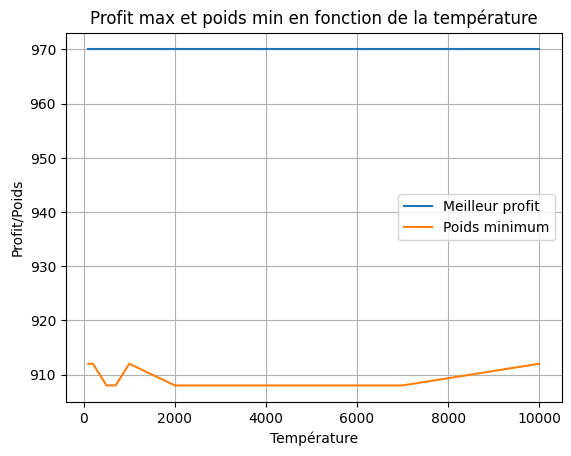

In [52]:
x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

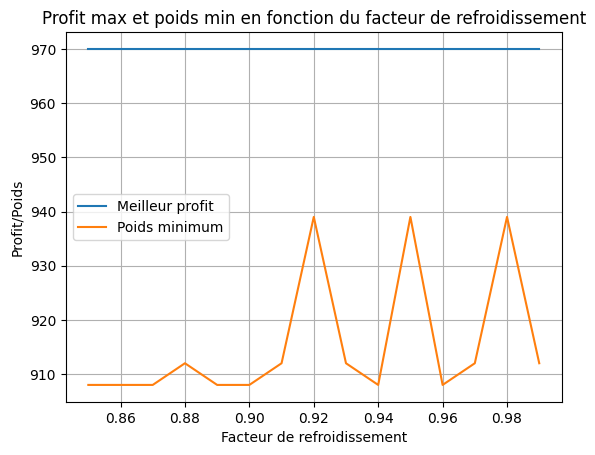

In [53]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

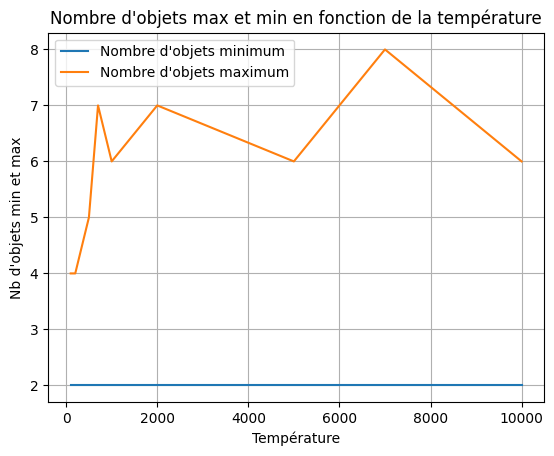

In [54]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

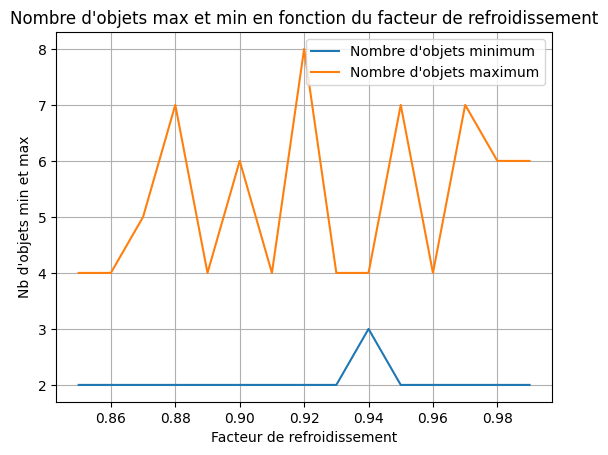

In [55]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

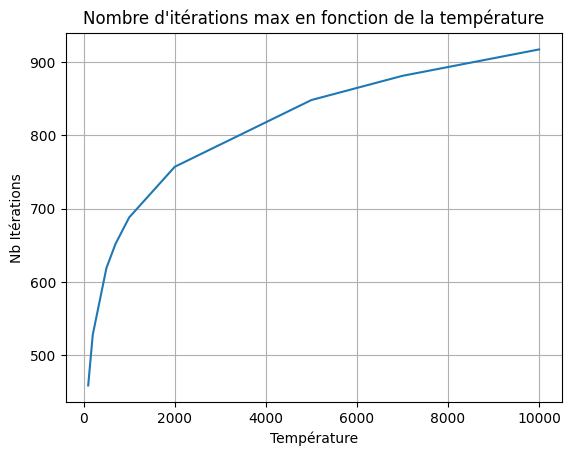

In [56]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

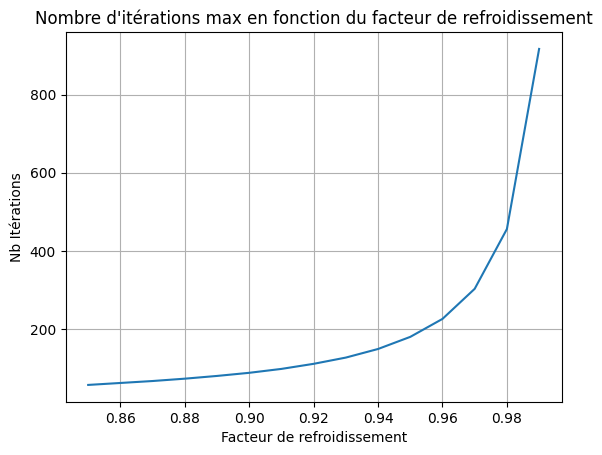

In [57]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

In [ ]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule100_12.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [72]:
def find_files_with_profit_and_weight(target_profit, target_weight):
    filenames = []
    for filename in os.listdir():
        if filename.startswith("Temp") and filename.endswith(".csv"):
            try:
                df = pd.read_csv(filename)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    if any((df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames

In [73]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.


A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [74]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

In [62]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [63]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {}
Cooling rate counts: {}


ValueError: max() arg is an empty sequence

#### Métaheuristique 2 - Génétique

In [75]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [76]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [77]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [78]:
def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: int,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    for generation in range(nbGen):
        new_population = []

        # Sélection par roulette et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            # Ajouter les enfants à la nouvelle population
            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions dans la population
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Mettre à jour la meilleure solution trouvée
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    return best_solution, best_profit

In [81]:
nbPop = 10  # Taille de la population
nbGen = 50  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi12_n100, max_capacity_pi12_n100, weights_pi12_n100, profits_pi12_n100, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi12_n100))

Meilleure solution trouvée : 1000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Meilleur profit : 970
Poids atteind : 970


#### Tests

In [ ]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest):
                    results = []
                    
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    end_time = time.time()
                    execution_time = end_time - start_time  # Temps en secondes

                    # Calculer le poids et le nombre d'objets de la meilleure solution
                    best_weight = calculate_weight(best_solution, weights)
                    nb_objects = sum(1 for i in range(len(best_solution)) if best_solution[i] == "1")

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Nb objets": nb_objects,
                        "Temps (s)": execution_time
                    })

                    # Convertir en DataFrame et sauvegarder le fichier
                    df = pd.DataFrame(results)
                    return df
                


In [ ]:
# Fixer un interval pour les paramètres

nbPop_list = [10, 50, 70, 100]
nbGen_list = [10, 50, 70, 100]
probaCross_list = [0.1, 0.5, 0.9]
nbBest_list = [2, 5]

for nbPop in nbPop_list:
    for nbGen in nbGen_list:
        for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")
                test_algo_genetique(nb_items_pi12_n100, max_capacity_pi12_n100, weights_pi12_n100, profits_pi12_n100, nbPop_list, nbGen_list, probaCross_list, nbBest_list)
                test.to_csv(f"Resultats/NbPop{nbPop}_NbGen{nbGen}_ProbaCorss{probaCross}_NbBest{nbBest}_resultats_algo_genetique{nb_items_pi12_n100}.csv", index=False)


NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 10
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 50
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 2
NbPop 10
NbGen 70
ProbaCross 0.9
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.1
NbBest 5
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 2
NbPop 10
NbGen 100
ProbaCross 0.5
NbBest 5
NbPop 10
NbGen 100
ProbaCross 

In [ ]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [ ]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: 970, 0.2: 970, 0.3: 970, 0.4: 970, 0.5: 970, 0.6: 970, 0.7: 970, 0.8: 970, 0.9: 970}


In [ ]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: 908, 0.2: 908, 0.3: 908, 0.4: 908, 0.5: 908, 0.6: 908, 0.7: 908, 0.8: 908, 0.9: 908}


In [ ]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [ ]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [ ]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{5: 970, 10: 970, 20: 970, 50: 970, 70: 970, 100: 970}


In [ ]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{5: 908, 10: 908, 20: 908, 50: 908, 70: 908, 100: 908}


In [ ]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [ ]:
max_profit_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profit_nbBest)

{2: 970, 5: 970}


In [ ]:
min_weight_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weight_nbBest)

{2: 908, 5: 908}


In [ ]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [ ]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{5: 970, 10: 970, 20: 970, 50: 970, 70: 970, 100: 970}


In [ ]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{5: 908, 10: 908, 20: 908, 50: 908, 70: 908, 100: 908}


In [ ]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique100.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight):
    filenames = []
    for filename in os.listdir():
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            try:
                df = pd.read_csv(filename)
                if any((df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)):
                    filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames

In [ ]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [ ]:
target_profit = 1989
target_weight = 969
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

NbPop20_NbGen100_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.3_NbBest5_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.7_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen10_ProbaCross0.4_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen70_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen10_ProbaCross0.5_NbBest2_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen5_ProbaCross0.4_NbBest5_resultats_algo_genetique100.csv
NbPop20_NbGen10_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen70_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.9_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.6_NbBest2_resultats_algo_genetique100.csv
NbPop70_NbGen50_ProbaCross0.6_NbBest5_resultats_algo_genetique100.csv
NbPop100_NbGen100_ProbaC

In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [ ]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

{20: 108, 5: 107, 70: 108, 10: 108, 50: 108, 100: 108}
{100: 108, 10: 108, 70: 108, 5: 107, 20: 108, 50: 108}
{0.2: 72, 0.3: 72, 0.7: 72, 0.4: 72, 0.5: 72, 0.9: 72, 0.6: 72, 0.8: 72, 0.1: 71}
{2: 323, 5: 324}
Le nombre de population optimal est: 20
Le nombre de génération optimal est: 100
La probabilité de croisement optimale est: 0.2
Le nombre de meilleures solutions optimal est: 5


### Pi-12: n = 1000

In [1]:
file_pi12_n1000 = "pi-12-1000-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [2]:
profits_pi12_n1000, weights_pi12_n1000 = extract_data(file_pi12_n1000)
profits_pi12_n1000 = [int(i) for i in profits_pi12_n1000]
weights_pi12_n1000 = [int(i) for i in weights_pi12_n1000]
print(profits_pi12_n1000)
print(weights_pi12_n1000)
print(len(profits_pi12_n1000))
print(len(weights_pi12_n1000))

[582, 194, 679, 485, 312, 873, 468, 208, 364, 260, 582, 388, 291, 104, 520, 416, 970, 260, 582, 364, 776, 194, 468, 970, 312, 260, 156, 485, 416, 364, 582, 388, 468, 679, 52, 156, 312, 520, 52, 520, 468, 260, 468, 582, 388, 291, 468, 485, 312, 104, 468, 194, 97, 776, 388, 468, 416, 104, 104, 582, 485, 208, 388, 520, 104, 260, 364, 582, 468, 260, 208, 156, 679, 679, 97, 582, 97, 156, 679, 520, 208, 291, 776, 52, 291, 468, 156, 520, 468, 52, 873, 194, 520, 873, 873, 104, 873, 416, 776, 312, 468, 260, 520, 873, 97, 364, 468, 485, 104, 970, 582, 873, 776, 104, 416, 416, 485, 312, 194, 388, 260, 776, 156, 468, 873, 104, 156, 312, 970, 260, 104, 156, 416, 520, 208, 104, 97, 156, 364, 679, 156, 291, 416, 485, 52, 679, 776, 260, 970, 364, 97, 312, 208, 104, 679, 52, 194, 970, 194, 291, 388, 388, 194, 679, 52, 520, 52, 364, 520, 776, 776, 520, 873, 970, 485, 364, 291, 970, 291, 364, 416, 679, 156, 416, 52, 582, 291, 388, 520, 156, 104, 312, 776, 582, 468, 416, 208, 679, 260, 970, 970, 97, 485, 

In [8]:
nb_items_pi12_n1000, max_capacity_pi12_n1000 = extract_info(file_pi12_n1000)
print(nb_items_pi12_n1000)
print(max_capacity_pi12_n1000)

1000
4556


In [13]:
print("Poids à ne pas dépasser: ",max_capacity_pi12_n1000)
a_solution = gen_valid_solution(max_capacity_pi12_n1000, weights_pi12_n1000, nb_items_pi12_n1000)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi12_n1000))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi12_n1000))

Poids à ne pas dépasser:  4556
Une solution valide est:  1001011000000100110001000100000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### La solution optimale avec un solver

In [ ]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi12_n1000, weights_pi12_n1000, max_capacity_pi12_n1000)

target_profit = best_profit
target_weight = sum(weights_pi12_n1000[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
print("Temps d'exécution : ", time2 - time1)

Meilleure solution trouvée : [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [17]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (string):", best_solution_str)

Meilleure solution trouvée (string): 000001000000000010000000000000000010000000000000000000000000000000000000000000000000000000100110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Métaheuristique 1 - Recuit simulé

#### Tests


In [ ]:
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n1000, profits_pi12_n1000, weights_pi12_n1000, nb_items_pi12_n1000)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n1000}_12.csv", index=False)

Temp 100
Cooling rate 0.85
Temp 100
Cooling rate 0.86
Temp 100
Cooling rate 0.87
Temp 100
Cooling rate 0.88
Temp 100
Cooling rate 0.89
Temp 100
Cooling rate 0.9
Temp 100
Cooling rate 0.91
Temp 100
Cooling rate 0.92
Temp 100
Cooling rate 0.93
Temp 100
Cooling rate 0.94
Temp 100
Cooling rate 0.95
Temp 100
Cooling rate 0.96
Temp 100
Cooling rate 0.97
Temp 100
Cooling rate 0.98
Temp 100
Cooling rate 0.99
Temp 200
Cooling rate 0.85
Temp 200
Cooling rate 0.86
Temp 200
Cooling rate 0.87
Temp 200
Cooling rate 0.88
Temp 200
Cooling rate 0.89
Temp 200
Cooling rate 0.9
Temp 200
Cooling rate 0.91
Temp 200
Cooling rate 0.92
Temp 200
Cooling rate 0.93
Temp 200
Cooling rate 0.94
Temp 200
Cooling rate 0.95
Temp 200
Cooling rate 0.96
Temp 200
Cooling rate 0.97
Temp 200
Cooling rate 0.98
Temp 200
Cooling rate 0.99
Temp 500
Cooling rate 0.85
Temp 500
Cooling rate 0.86
Temp 500
Cooling rate 0.87
Temp 500
Cooling rate 0.88
Temp 500
Cooling rate 0.89
Temp 500
Cooling rate 0.9
Temp 500
Cooling rate 0.91
Temp

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [ ]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [ ]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: 4362, 200: 4286, 500: 4400, 700: 4286, 1000: 4400, 2000: 4286, 5000: 4286, 7000: 4362, 10000: 4286}


In [ ]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: 4400, 0.86: 4286, 0.87: 4362, 0.88: 4286, 0.89: 4286, 0.9: 4286, 0.91: 4324, 0.92: 4362, 0.93: 4286, 0.94: 4324, 0.95: 4400, 0.96: 4286, 0.97: 4324, 0.98: 4286, 0.99: 4324}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [ ]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [ ]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: 4498, 200: 4494, 500: 4498, 700: 4502, 1000: 4494, 2000: 4498, 5000: 4494, 7000: 4533, 10000: 4494}


In [ ]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: 4514, 0.86: 4494, 0.87: 4510, 0.88: 4525, 0.89: 4506, 0.9: 4494, 0.91: 4510, 0.92: 4506, 0.93: 4525, 0.94: 4498, 0.95: 4502, 0.96: 4494, 0.97: 4525, 0.98: 4498, 0.99: 4494}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [ ]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [ ]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [ ]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: 13, 200: 14, 500: 15, 700: 27, 1000: 25, 2000: 20, 5000: 31, 7000: 33, 10000: 26}
{100: 8, 200: 9, 500: 9, 700: 9, 1000: 8, 2000: 9, 5000: 11, 7000: 10, 10000: 9}


In [ ]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: 15, 0.86: 15, 0.87: 18, 0.88: 18, 0.89: 21, 0.9: 21, 0.91: 17, 0.92: 23, 0.93: 23, 0.94: 26, 0.95: 17, 0.96: 18, 0.97: 30, 0.98: 24, 0.99: 33}
{0.85: 8, 0.86: 9, 0.87: 9, 0.88: 8, 0.89: 10, 0.9: 10, 0.91: 10, 0.92: 9, 0.93: 10, 0.94: 9, 0.95: 9, 0.96: 8, 0.97: 10, 0.98: 10, 0.99: 10}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [ ]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [ ]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: 459, 200: 528, 500: 619, 700: 652, 1000: 688, 2000: 757, 5000: 848, 7000: 881, 10000: 917}


In [ ]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: 57, 0.86: 62, 0.87: 67, 0.88: 73, 0.89: 80, 0.9: 88, 0.91: 98, 0.92: 111, 0.93: 127, 0.94: 149, 0.95: 180, 0.96: 226, 0.97: 303, 0.98: 456, 0.99: 917}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [ ]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [ ]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: 4.254718065261841, 200: 6.044326543807983, 500: 2.6376495361328125, 700: 2.959451675415039, 1000: 2.8687705993652344, 2000: 2.387779474258423, 5000: 2.346730232238769, 7000: 2.650384426116944, 10000: 2.6352286338806152}


In [ ]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: 0.4163100719451904, 0.86: 0.5868146419525146, 0.87: 0.4755353927612304, 0.88: 0.5891842842102051, 0.89: 0.6987614631652832, 0.9: 0.6082844734191895, 0.91: 0.6951704025268555, 0.92: 1.2809410095214844, 0.93: 1.6132252216339111, 0.94: 1.1432812213897705, 0.95: 1.48986554145813, 0.96: 2.0671019554138184, 0.97: 2.4434616565704346, 0.98: 2.3011815547943115, 0.99: 6.044326543807983}


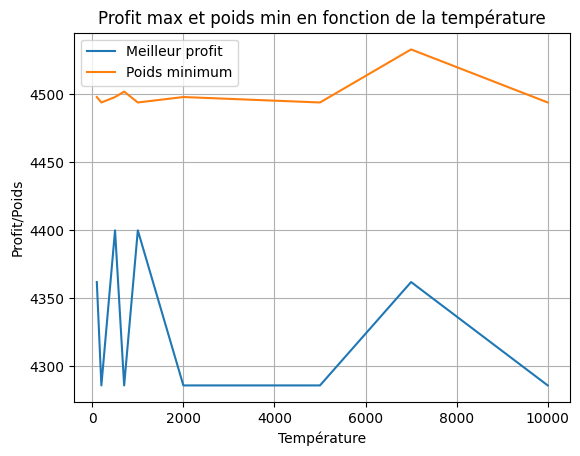

In [ ]:
x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

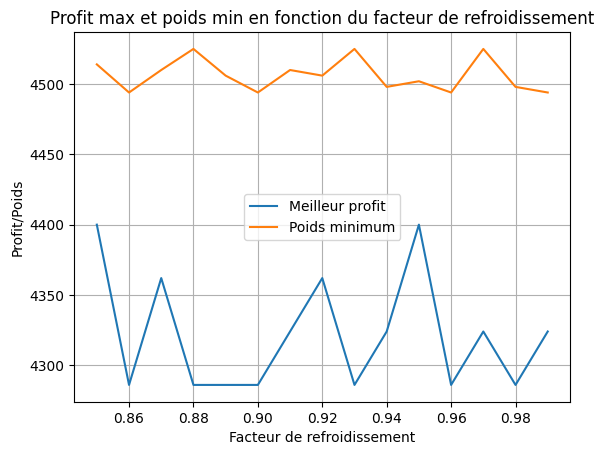

In [ ]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

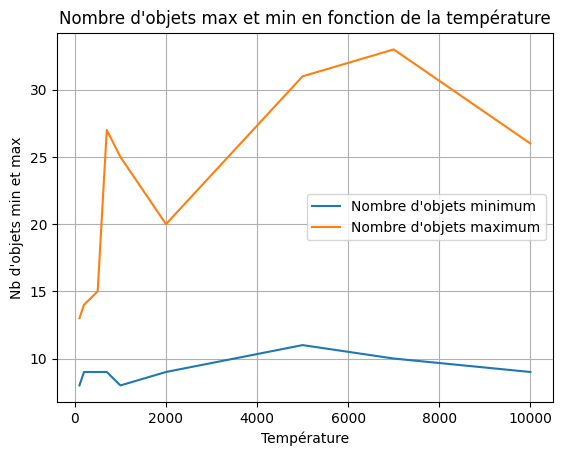

In [ ]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

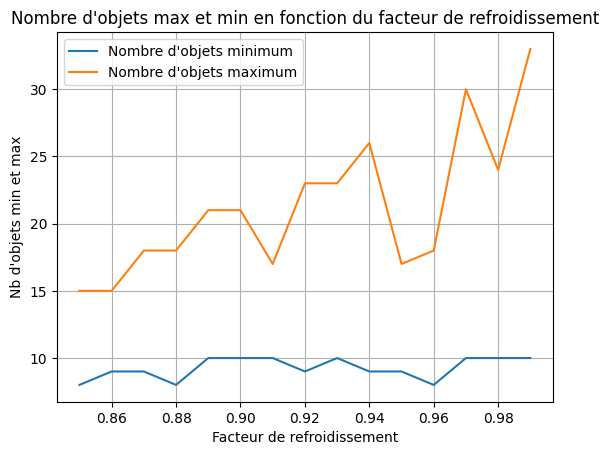

In [ ]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

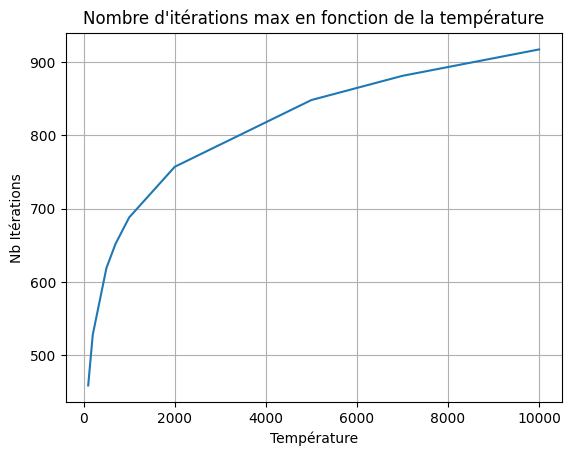

In [ ]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

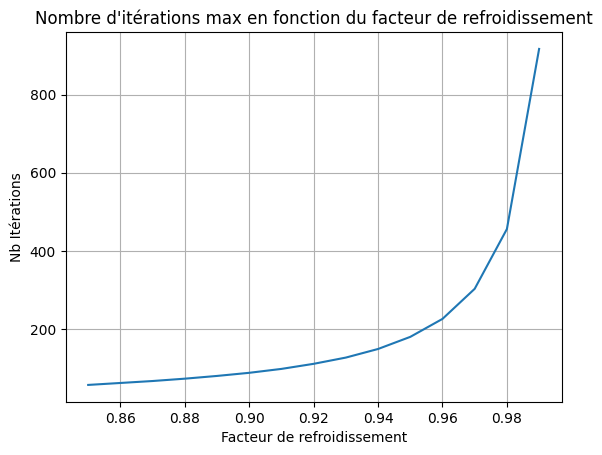

In [ ]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

In [ ]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule1000_12.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight):
    filenames = []
    for filename in os.listdir():
        if filename.startswith("Temp") and filename.endswith(".csv"):
            try:
                df = pd.read_csv(filename)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    if any((df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames

In [ ]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [ ]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

In [ ]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            # Update counts
            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [ ]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {}
Cooling rate counts: {}


ValueError: max() arg is an empty sequence

#### Métaheuristique 2 - Génétique

In [ ]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [ ]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [ ]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [ ]:
def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: int,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    for generation in range(nbGen):
        new_population = []

        # Sélection par roulette et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            # Ajouter les enfants à la nouvelle population
            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions dans la population
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Mettre à jour la meilleure solution trouvée
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    return best_solution, best_profit

In [ ]:
nbPop = 10  # Taille de la population
nbGen = 50  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi12_n1000, max_capacity_pi12_n1000, weights_pi12_n1000, profits_pi12_n1000, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi12_n1000))

Meilleure solution trouvée : 1000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Meilleur profit : 970
Poids atteind : 970


#### Tests

In [ ]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    """
    Teste l'algorithme génétique sur différentes configurations et enregistre les résultats.

    Args:
        nb_items (int): Nombre d'objets.
        max_capacity (int): Capacité maximale du sac.
        weights (list): Liste des poids des objets.
        profits (list): Liste des profits des objets.
        nbPop_list (list): Liste des tailles de population à tester.
        nbGen_list (list): Liste du nombre de générations à tester.
        probaCross_list (list): Liste des probabilités de croisement à tester.
        nbBest_list (list): Liste du nombre de meilleures solutions à conserver.

    Returns:
        pd.DataFrame: Tableau des résultats de l'algorithme génétique.
    """

    results = []

    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    execution_time = time.time() - start_time  # Temps en secondes

                    # Calculer le poids de la meilleure solution trouvée
                    best_weight = calculate_weight(best_solution, weights)

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Temps (s)": execution_time
                    })

                    print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")

                    # Convertir les résultats en DataFrame et sauvegarder en CSV
                    df = pd.DataFrame(results)
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"
                    df.to_csv(os.path.join(file_name), index=False)

    # Retourner un DataFrame avec tous les résultats
    return pd.DataFrame(results)


In [ ]:
nbPop_list = [5, 10, 20, 50, 70, 100]
nbBest_list = [2, 5]
nbGen_list = [5, 10, 20, 50, 70, 100]
probaCross_list = [round(0.1 + i * 0.1, 2) for i in range(9)] # pour [0.1. .... 0.9]

#test_algo_genetique(nb_items_pi12_n1000, max_capacity_pi12_n1000, weights_pi12_n1000, profits_pi12_n1000, nbPop, nbGen_list, probaCross_list, nbBest_list)


In [ ]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [ ]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: 970, 0.2: 970, 0.3: 970, 0.4: 970, 0.5: 970, 0.6: 970, 0.7: 970, 0.8: 970, 0.9: 970}


In [ ]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: 908, 0.2: 908, 0.3: 908, 0.4: 908, 0.5: 908, 0.6: 908, 0.7: 908, 0.8: 908, 0.9: 908}


In [ ]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [ ]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [ ]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{5: 970, 10: 970, 20: 970, 50: 970, 70: 970, 100: 970}


In [ ]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{5: 908, 10: 908, 20: 908, 50: 908, 70: 908, 100: 908}


In [ ]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [ ]:
max_profit_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profit_nbBest)

{2: 970, 5: 970}


In [ ]:
min_weight_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weight_nbBest)

{2: 908, 5: 908}


In [ ]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [ ]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{5: 970, 10: 970, 20: 970, 50: 970, 70: 970, 100: 970}


In [ ]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{5: 908, 10: 908, 20: 908, 50: 908, 70: 908, 100: 908}


In [ ]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight):
    filenames = []
    for filename in os.listdir():
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            try:
                df = pd.read_csv(filename)
                if any((df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)):
                    filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames

In [ ]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [ ]:
target_profit = 6513
target_weight = 3173
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

NbPop20_NbGen100_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.3_NbBest5_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.7_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen10_ProbaCross0.4_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen70_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen10_ProbaCross0.5_NbBest2_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen5_ProbaCross0.4_NbBest5_resultats_algo_genetique100.csv
NbPop20_NbGen10_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen70_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.9_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.6_NbBest2_resultats_algo_genetique100.csv
NbPop70_NbGen50_ProbaCross0.6_NbBest5_resultats_algo_genetique100.csv
NbPop100_NbGen100_ProbaC

In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [ ]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

{20: 108, 5: 107, 70: 108, 10: 108, 50: 108, 100: 108}
{100: 108, 10: 108, 70: 108, 5: 107, 20: 108, 50: 108}
{0.2: 72, 0.3: 72, 0.7: 72, 0.4: 72, 0.5: 72, 0.9: 72, 0.6: 72, 0.8: 72, 0.1: 71}
{2: 323, 5: 324}
Le nombre de population optimal est: 20
Le nombre de génération optimal est: 100
La probabilité de croisement optimale est: 0.2
Le nombre de meilleures solutions optimal est: 5


### Pi-12: n=10 000

In [ ]:
file_pi12_n10000 = "pi-13-10000-1000-001.kna"

def extract_data(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      profit = []
      weight = []
      for i in range(7, len(content)):
        profit.append(content[i].split(" ")[1])
        weight.append(content[i].split(" ")[2].split("\n")[0])
  return profit, weight

In [ ]:
profits_pi12_n10000, weights_pi12_n10000 = extract_data(file_pi12_n10000)
profits_pi12_n10000 = [int(i) for i in profits_pi12_n10000]
weights_pi12_n10000 = [int(i) for i in weights_pi12_n10000]
print(profits_pi12_n10000)
print(weights_pi12_n10000)

[234, 39, 1053, 351, 585, 78, 117, 234, 312, 156, 156, 273, 351, 351, 312, 468, 156, 585, 468, 1053, 702, 1053, 819, 234, 39, 1170, 234, 234, 351, 936, 468, 351, 351, 156, 351, 390, 468, 156, 312, 390, 468, 702, 234, 1170, 195, 117, 351, 936, 585, 78, 702, 234, 117, 117, 117, 819, 234, 702, 702, 156, 39, 351, 1170, 117, 156, 390, 390, 78, 1053, 936, 312, 156, 312, 39, 351, 39, 819, 585, 234, 585, 1170, 468, 195, 351, 312, 273, 1170, 312, 390, 936, 390, 1053, 585, 390, 117, 117, 78, 117, 234, 273, 702, 936, 156, 702, 585, 351, 312, 156, 351, 468, 117, 117, 273, 39, 468, 1170, 390, 195, 702, 1053, 39, 1170, 117, 234, 234, 819, 234, 936, 702, 585, 1170, 156, 234, 234, 156, 78, 78, 117, 1170, 1170, 195, 234, 117, 1170, 585, 936, 117, 117, 702, 585, 1170, 195, 936, 468, 234, 585, 234, 273, 273, 351, 351, 117, 273, 117, 117, 468, 78, 234, 936, 468, 273, 351, 234, 351, 39, 351, 78, 117, 351, 351, 234, 390, 39, 390, 156, 390, 351, 117, 195, 234, 390, 468, 156, 585, 585, 468, 156, 78, 117, 702,

In [ ]:
def extract_info(file_path):
  with open(file_path, 'r') as f:
      content = f.readlines()
      content_line4 = content[3].split("NB_ITEMS: ")
      nb_items = content_line4[1].split("\n")[0]
      content_line5 = content[4].split("MAX_CAPACITY: ")
      max_capacity = content_line5[1].split("\n")[0]
      max_capacity = int(max_capacity)


  return int(nb_items), int(max_capacity)

In [ ]:
nb_items_pi12_n10000, max_capacity_pi12_n10000 = extract_info(file_pi12_n10000)
print(nb_items_pi12_n10000)
print(max_capacity_pi12_n10000)

10000
31234


In [ ]:
def calculate_profit(
    solution: str,
    profits: list
  ):

  profit = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      profit += int(profits[i])

  return profit

In [ ]:
def calculate_weight(
    solution: str,
    weights: list
  ):

  weight = 0
  for i in range(len(solution)):
    if solution[i] == "1":
      weight += int(weights[i])

  return weight

#### Création d'une solution valide (pas forcément optimale):
-->Ajouter des items aléatoirement dans le sac à dos jusqu'à arriver au poids maximal.

In [ ]:
import random

def gen_valid_solution(max_capacity, weights, nb_items):
    sol = []  #liste pour stocker la solution binaire
    current_capacity = 0

    for i in range(nb_items):
        if current_capacity >= max_capacity:
            sol.append("0")  # Si on atteint la limite, on met "0"
        else:
            bit = random.choice(["0", "1"])
            if bit == "1" and current_capacity + weights[i] > max_capacity:
                bit = "0"  # On force un "0" si ajouter 1 dépasse la capacité
            sol.append(bit)
            if bit == "1":
                current_capacity += weights[i]  # Mise à jour du poids

    return "".join(sol)


In [ ]:
print("Poids à ne pas dépasser: ",max_capacity_pi12_n10000)
a_solution = gen_valid_solution(max_capacity_pi12_n10000, weights_pi12_n10000, nb_items_pi12_n10000)
print("Une solution valide est: ", a_solution)
print("Le profit de cette solution est: ", calculate_profit(a_solution, profits_pi12_n10000))
print("Le poids total de cette solution est: ", calculate_weight(a_solution, weights_pi12_n10000))

Poids à ne pas dépasser:  31234
Une solution valide est:  101000100011000010110101101101000111101001101000001000000110111010101111011010000001101110010001101010100111011110000100001110101101111010000001000110101000111110010010100001010001000001110000011111010001010001010111001110010010000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### La solution optimale avec un solver

In [ ]:
from ortools.linear_solver import pywraplp
import numpy as np
import time

def solve_knapsack(profits, weights, capacity_max):

    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        print("Solveur non disponible.")
        return None, None

    n = len(profits)

    x = [solver.BoolVar(f'x_{i}') for i in range(n)]

    # Ajout de la contrainte de capacité
    solver.Add(solver.Sum(weights[i] * x[i] for i in range(n)) <= capacity_max)

    # Définition de la fonction objectif : Maximiser le profit total
    solver.Maximize(solver.Sum(profits[i] * x[i] for i in range(n)))

    # Résolution du problème
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        # Extraction de la solution optimale
        best_solution = [int(x[i].solution_value()) for i in range(n)]
        best_profit = solver.Objective().Value()
        return best_solution, best_profit
    else:
        print("Aucune solution optimale trouvée.")
        return None, None
time1 = time.time()

best_solution, best_profit = solve_knapsack(profits_pi12_n10000, weights_pi12_n10000, max_capacity_pi12_n10000)

target_profit = best_profit
target_weight = sum(weights_pi12_n10000[i] for i in range(len(best_solution)) if best_solution[i] == 1)
if best_solution:
    print("Meilleure solution trouvée :", best_solution)
    print("Meilleur profit :", target_profit)
    print("Poids atteint :", target_weight)


indice = np.where(np.array(best_solution) == 1)[0]
print(indice)
time2 = time.time()
print("Temps d'exécution : ", time2 - time1)

Meilleure solution trouvée : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
best_solution_str = "".join(map(str, best_solution))
print("Meilleure solution trouvée (string):", best_solution_str)

Meilleure solution trouvée (string): 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Métaheuristique 1 - Recuit simulé

In [ ]:
# Test du recuit simulé

print("Poids à ne pas dépasser:", max_capacity_pi12_n10000)
initial_solution = gen_valid_solution(max_capacity_pi12_n10000, weights_pi12_n10000, nb_items_pi12_n10000)

print("Solution initiale choisie aléatoirement: ",initial_solution)
print("Son profit actuel:",calculate_profit(initial_solution, profits_pi12_n10000))
print("Son poids actuel:",calculate_weight(initial_solution, weights_pi12_n10000))
print()

temperature = 1000
cooling_rate = 0.95

best_sol, best_prof, iterations = simulated_annealing(initial_solution, max_capacity_pi12_n10000, profits_pi12_n10000, weights_pi12_n10000, temperature, cooling_rate)
print("Meilleure solution trouvée :", best_sol)
print("Meilleur profit :", best_prof)
print("Poids atteind :", calculate_weight(best_sol, weights_pi12_n10000))
print(f"Solution trouvée en {iterations} itérations")


Poids à ne pas dépasser: 31234
Solution initiale choisie aléatoirement:  000010110111101001001001011010000101100110110100100101000110000111101000001001011001011111010001100110101010001011111100001101001001000010110011001110000110111100101011100100001100011001110110010010101100101000001000100011000010000100000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Tests


In [ ]:
import pandas as pd
import time

def test_recuit_simule(temperature, cooling_rate, max_capacity, profits, weights, nb_items):
    results = []

    # Générer une solution initiale valide
    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
    initial_profit = calculate_profit(initial_solution, profits)
    initial_weight = calculate_weight(initial_solution, weights)

    # Démarrer le chronomètre
    start_time = time.time()

    # Appliquer le recuit simulé
    best_solution, best_profit, iterations = simulated_annealing(
        initial_solution, max_capacity, profits, weights, temperature, cooling_rate
    )

    # Arrêter le chronomètre
    end_time = time.time()
    execution_time = end_time - start_time  # Temps en secondes

    best_weight = calculate_weight(best_solution, weights)
    nb_objects = 0
    for i in range(len(best_solution)):
      if best_solution[i] == "1":
        nb_objects += 1

    # Enregistrement des résultats
    results.append({
        "Solution initiale": initial_solution,
        "Profit initial": initial_profit,
        "Poids initial": initial_weight,
        "Temperature": temperature,
        "Cooling Rate": cooling_rate,
        "Nouvelle solution": best_solution,
        "Nouveau profit": best_profit,
        "Nouveau Poids": best_weight,
        "Nb Itérations": iterations,
        "Nb objets": nb_objects,
        "Temps (s)": execution_time
    })

    # Convertir en DataFrame pandas
    df = pd.DataFrame(results)

    return df

In [ ]:
temperatures = [100, 200, 500, 700, 1000, 2000, 5000, 7000, 10000]
cooling_rates = [round(0.85 + i * 0.01, 2) for i in range(15)] # pour [0.85, 0.86, ..., 0.99]

for temperature in temperatures:
    for cooling_rate in cooling_rates:
        print(f"Temp {temperature}\nCooling rate {cooling_rate}")
        test = test_recuit_simule(temperature, cooling_rate, max_capacity_pi12_n10000, profits_pi12_n10000, weights_pi12_n10000, nb_items_pi12_n10000)
        test.to_csv(f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule{nb_items_pi12_n10000}_12.csv", index=False)


Temp 100
Cooling rate 0.85
Temp 100
Cooling rate 0.86
Temp 100
Cooling rate 0.87
Temp 100
Cooling rate 0.88
Temp 100
Cooling rate 0.89
Temp 100
Cooling rate 0.9
Temp 100
Cooling rate 0.91
Temp 100
Cooling rate 0.92
Temp 100
Cooling rate 0.93
Temp 100
Cooling rate 0.94
Temp 100
Cooling rate 0.95
Temp 100
Cooling rate 0.96
Temp 100
Cooling rate 0.97
Temp 100
Cooling rate 0.98
Temp 100
Cooling rate 0.99
Temp 200
Cooling rate 0.85
Temp 200
Cooling rate 0.86
Temp 200
Cooling rate 0.87
Temp 200
Cooling rate 0.88
Temp 200
Cooling rate 0.89
Temp 200
Cooling rate 0.9
Temp 200
Cooling rate 0.91
Temp 200
Cooling rate 0.92
Temp 200
Cooling rate 0.93
Temp 200
Cooling rate 0.94
Temp 200
Cooling rate 0.95
Temp 200
Cooling rate 0.96
Temp 200
Cooling rate 0.97
Temp 200
Cooling rate 0.98
Temp 200
Cooling rate 0.99
Temp 500
Cooling rate 0.85
Temp 500
Cooling rate 0.86
Temp 500
Cooling rate 0.87
Temp 500
Cooling rate 0.88
Temp 500
Cooling rate 0.89
Temp 500
Cooling rate 0.9
Temp 500
Cooling rate 0.91
Temp

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_profit_from_temp(temperatures, cooling_rates):
    max_profits = {}

    for temperature in temperatures:
        max_profit = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_profit = max(max_profit, df["Nouveau profit"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[temperature] = max_profit

    return max_profits


In [ ]:
import pandas as pd
import os

def extract_max_profit_from_CR(temperatures, cooling_rates):
    max_profits = {}

    for cooling_rate in cooling_rates:
        max_profit = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nouveau profit"].max()
                max_profit = max(max_profit, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        max_profits[cooling_rate] = max_profit if max_profit != float('-inf') else None

    return max_profits


In [ ]:
max_profits_temp = extract_max_profit_from_temp(temperatures, cooling_rates)
print(max_profits_temp)

{100: 970, 200: 970, 500: 970, 700: 970, 1000: 970, 2000: 970, 5000: 970, 7000: 970, 10000: 970}


In [ ]:
max_profits_CR = extract_max_profit_from_CR(temperatures, cooling_rates)
print(max_profits_CR)

{0.85: 970, 0.86: 970, 0.87: 970, 0.88: 970, 0.89: 970, 0.9: 970, 0.91: 970, 0.92: 970, 0.93: 970, 0.94: 970, 0.95: 970, 0.96: 970, 0.97: 970, 0.98: 970, 0.99: 970}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_weight_from_temp(temperatures, cooling_rates):
    min_weights = {}

    for temperature in temperatures:
        min_weight = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Warning: File {file_name} not found.")

        min_weights[temperature] = min_weight

    return min_weights

In [ ]:
def extract_min_weight_from_CR(temperatures, cooling_rates):
    min_weights = {}

    for cooling_rate in cooling_rates:
        min_weight = float('inf')

        for temperature in temperatures:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(filename):
                df = pd.read_csv(filename)
                min_weight = min(min_weight, df["Nouveau Poids"].min())
            else:
                print(f"Fichier manquant: {filename}")

        min_weights[cooling_rate] = min_weight

    return min_weights


In [ ]:
min_weights_temp = extract_min_weight_from_temp(temperatures, cooling_rates)
print(min_weights_temp)

{100: 912, 200: 912, 500: 912, 700: 939, 1000: 912, 2000: 908, 5000: 873, 7000: 908, 10000: 908}


In [ ]:
min_weights_CR = extract_min_weight_from_CR(temperatures, cooling_rates)
print(min_weights_CR)

{0.85: 908, 0.86: 873, 0.87: 912, 0.88: 939, 0.89: 939, 0.9: 916, 0.91: 912, 0.92: 912, 0.93: 912, 0.94: 908, 0.95: 908, 0.96: 939, 0.97: 939, 0.98: 908, 0.99: 939}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_min_object_from_temp(temperatures, cooling_rates):
    min_objects = {}

    for temperature in temperatures:
        min_object = float('inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                min_object = min(min_object, df["Nb objets"].min())
            else:
                print(f"Fichier manquant: {file_name}")

        min_objects[temperature] = min_object

    return min_objects

In [ ]:
import pandas as pd
import os

def extract_min_object_from_CR(temperatures, cooling_rates):
    min_objects = {}

    for cooling_rate in cooling_rates:
        min_object = float('inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_min = df["Nb objets"].min()
                min_object = min(min_object, current_min)
            else:
                print(f"Fichier manquant: {file_name}")

        if min_object != float('inf'):
            min_objects[cooling_rate] = min_object
        else:
            min_objects[cooling_rate] = None

    return min_objects


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_object_from_temp(temperatures, cooling_rates):
    max_objects = {}

    for temperature in temperatures:
        max_object = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_object = max(max_object, df["Nb objets"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_objects[temperature] = max_object

    return max_objects

In [ ]:
import pandas as pd
import os

def extract_max_object_from_CR(temperatures, cooling_rates):
    max_objects = {}

    for cooling_rate in cooling_rates:
        max_object = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb objets"].max()
                max_object = max(max_object, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_object != float('-inf'):
            max_objects[cooling_rate] = max_object
        else:
            max_objects[cooling_rate] = None

    return max_objects


In [ ]:
max_objects_temp = extract_max_object_from_temp(temperatures, cooling_rates)
print(max_objects_temp)
min_objects_temp = extract_min_object_from_temp(temperatures, cooling_rates)
print(min_objects_temp)

{100: 6, 200: 7, 500: 6, 700: 6, 1000: 4, 2000: 6, 5000: 6, 7000: 5, 10000: 6}
{100: 2, 200: 2, 500: 2, 700: 2, 1000: 2, 2000: 2, 5000: 2, 7000: 2, 10000: 2}


In [ ]:
max_objects_CR = extract_max_object_from_CR(temperatures, cooling_rates)
print(max_objects_CR)
min_objects_CR = extract_min_object_from_CR(temperatures, cooling_rates)
print(min_objects_CR)

{0.85: 5, 0.86: 4, 0.87: 6, 0.88: 5, 0.89: 5, 0.9: 5, 0.91: 5, 0.92: 3, 0.93: 6, 0.94: 4, 0.95: 6, 0.96: 4, 0.97: 5, 0.98: 6, 0.99: 7}
{0.85: 2, 0.86: 2, 0.87: 2, 0.88: 3, 0.89: 3, 0.9: 3, 0.91: 2, 0.92: 2, 0.93: 2, 0.94: 2, 0.95: 2, 0.96: 2, 0.97: 2, 0.98: 3, 0.99: 2}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_iterations_from_temp(temperatures, cooling_rates):
    max_iterations = {}

    for temperature in temperatures:
        max_iteration = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_iteration = max(max_iteration, df["Nb Itérations"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_iterations[temperature] = max_iteration

    return max_iterations

In [ ]:
import pandas as pd
import os

def extract_max_iterations_from_CR(temperatures, cooling_rates):
    max_iterations = {}

    for cooling_rate in cooling_rates:
        max_iteration = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Nb Itérations"].max()
                max_iteration = max(max_iteration, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_iteration != float('-inf'):
            max_iterations[cooling_rate] = max_iteration
        else:
            max_iterations[cooling_rate] = None

    return max_iterations


In [ ]:
max_iterations_temp = extract_max_iterations_from_temp(temperatures, cooling_rates)
print(max_iterations_temp)

{100: 459, 200: 528, 500: 619, 700: 652, 1000: 688, 2000: 757, 5000: 848, 7000: 881, 10000: 917}


In [ ]:
max_iterations_CR = extract_max_iterations_from_CR(temperatures, cooling_rates)
print(max_iterations_CR)

{0.85: 57, 0.86: 62, 0.87: 67, 0.88: 73, 0.89: 80, 0.9: 88, 0.91: 98, 0.92: 111, 0.93: 127, 0.94: 149, 0.95: 180, 0.96: 226, 0.97: 303, 0.98: 456, 0.99: 917}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_max_time_from_temp(temperatures, cooling_rates):
    max_times = {}

    for temperature in temperatures:
        max_time = float('-inf')

        for cooling_rate in cooling_rates:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                max_time = max(max_time, df["Temps (s)"].max())
            else:
                print(f"Fichier manquant: {file_name}")

        max_times[temperature] = max_time

    return max_times

In [ ]:
import pandas as pd
import os

def extract_max_time_from_CR(temperatures, cooling_rates):
    max_times = {}

    for cooling_rate in cooling_rates:
        max_time = float('-inf')

        for temperature in temperatures:
            file_name = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"

            if os.path.exists(file_name):
                df = pd.read_csv(file_name)
                current_max = df["Temps (s)"].max()
                max_time = max(max_time, current_max)
            else:
                print(f"Fichier manquant: {file_name}")

        if max_time != float('-inf'):
            max_times[cooling_rate] = max_time
        else:
            max_times[cooling_rate] = None

    return max_times


In [ ]:
max_time_temp = extract_max_time_from_temp(temperatures, cooling_rates)
print(max_time_temp)

{100: 0.1891589164733886, 200: 0.0907292366027832, 500: 0.1429746150970459, 700: 0.0987663269042968, 1000: 0.2008447647094726, 2000: 0.1407692432403564, 5000: 0.1525726318359375, 7000: 0.1378517150878906, 10000: 0.1508307456970214}


In [ ]:
max_time_CR = extract_max_time_from_CR(temperatures, cooling_rates)
print(max_time_CR)

{0.85: 0.0206911563873291, 0.86: 0.0310959815979003, 0.87: 0.0151307582855224, 0.88: 0.0229430198669433, 0.89: 0.0176529884338378, 0.9: 0.0202562808990478, 0.91: 0.0309798717498779, 0.92: 0.0408122539520263, 0.93: 0.0291221141815185, 0.94: 0.0526940822601318, 0.95: 0.0425713062286376, 0.96: 0.0550315380096435, 0.97: 0.0662951469421386, 0.98: 0.0910506248474121, 0.99: 0.2008447647094726}


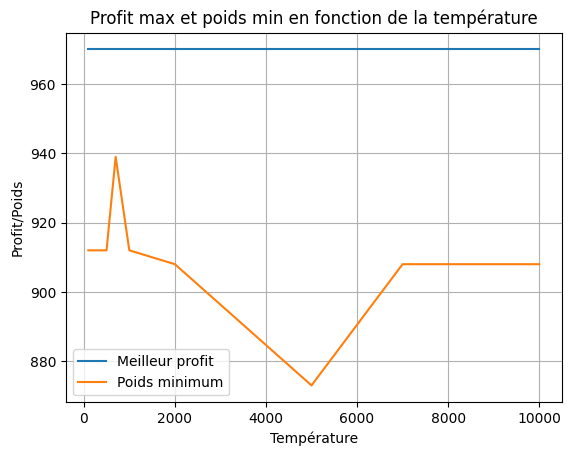

In [ ]:
# Dessiner les graphiques

x = temperatures
y1 = [max_profits_temp[temp] for temp in temperatures]
y2 = [min_weights_temp[temp] for temp in temperatures]

plt.plot(x, y1, label='Meilleur profit')
plt.plot(x, y2, label='Poids minimum')
plt.xlabel('Température')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction de la température')
plt.legend()
plt.grid()
plt.show()

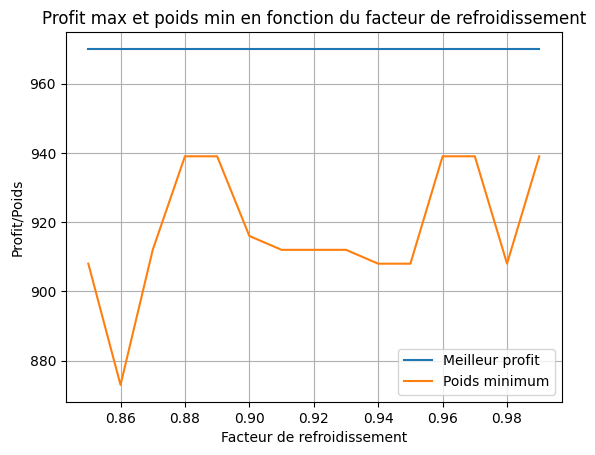

In [ ]:
z = cooling_rates
z1 = [max_profits_CR[cr] for cr in cooling_rates]
z2 = [min_weights_CR[cr] for cr in cooling_rates]

plt.plot(z, z1, label='Meilleur profit')
plt.plot(z, z2, label='Poids minimum')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Profit/Poids')
plt.title('Profit max et poids min en fonction du facteur de refroidissement')
plt.legend()
plt.grid()
plt.show()

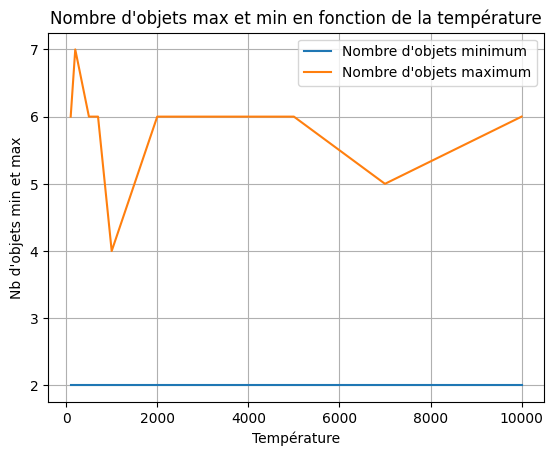

In [ ]:
y3 = [min_objects_temp[temp] for temp in temperatures]
y4 = [max_objects_temp[temp] for temp in temperatures]

plt.plot(x, y3, label='Nombre d\'objets minimum')
plt.plot(x, y4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction de la température")
plt.xlabel('Température')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

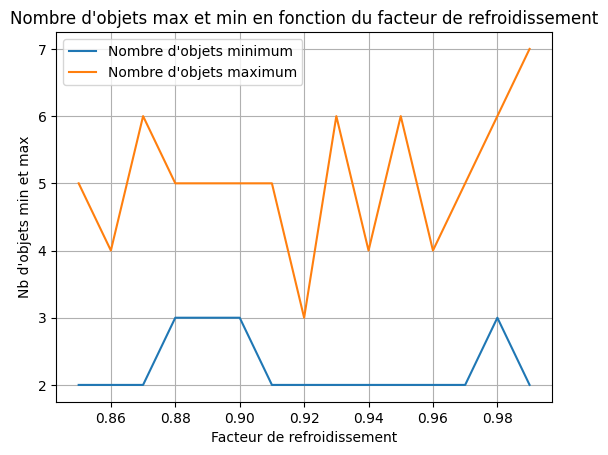

In [ ]:
z3 = [min_objects_CR[cr] for cr in cooling_rates]
z4 = [max_objects_CR[cr] for cr in cooling_rates]

plt.plot(z, z3, label='Nombre d\'objets minimum')
plt.plot(z, z4, label='Nombre d\'objets maximum')
plt.title("Nombre d'objets max et min en fonction du facteur de refroidissement")
plt.xlabel('Facteur de refroidissement')
plt.ylabel("Nb d'objets min et max")
plt.legend()
plt.grid()
plt.show()

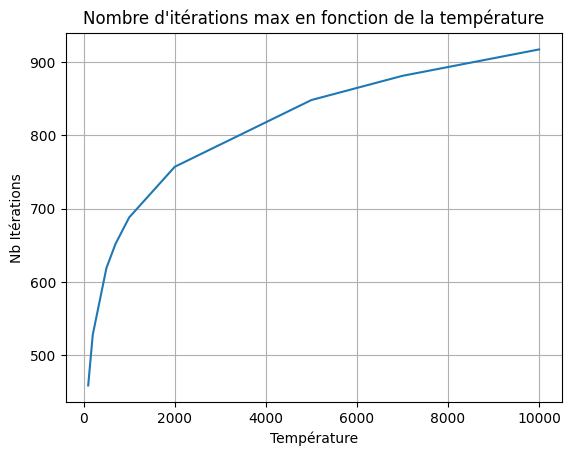

In [ ]:
y5 = [max_iterations_temp[temp] for temp in temperatures]

plt.plot(x, y5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction de la température')
plt.xlabel('Température')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

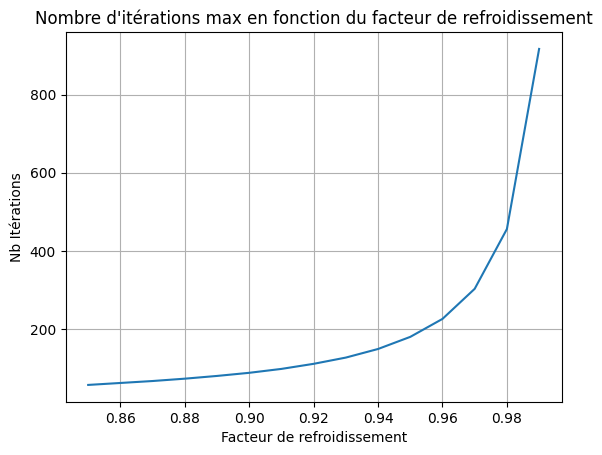

In [ ]:
z5 = [max_iterations_CR[cr] for cr in cooling_rates]

plt.plot(z, z5, label='Nombre d\'itérations maximum')
plt.title('Nombre d\'itérations max en fonction du facteur de refroidissement')
plt.xlabel('Facteur de refroidissement')
plt.ylabel('Nb Itérations')
plt.grid()
plt.show()

In [ ]:
import os
import pandas as pd

def find_optimal_solution(temperatures, cooling_rates, optimal_solution):
    filenames = []
    for temp in temperatures:
        for cr in cooling_rates:
            filename = f"Resultats/Temp{temperature}_CR{cooling_rate}resultats_recuit_simule10000_12.csv"
            if os.path.exists(filename):
                try:
                    df = pd.read_csv(filename)
                    if "Nouvelle solution" in df.columns:
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                except pd.errors.ParserError:
                    print(f"Warning: Could not parse file {filename}. Skipping.")
    return filenames

In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight):
    filenames = []
    for filename in os.listdir():
        if filename.startswith("Temp") and filename.endswith(".csv"):
            try:
                df = pd.read_csv(filename)
                if 'Nouveau profit' in df.columns and 'Nouveau Poids' in df.columns:
                    if any((df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)):
                        filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames

In [ ]:
fichier_optimal = find_optimal_solution(temperatures, cooling_rates, best_solution_str)

if len(fichier_optimal) == 0:
    print("Le recuit simulé n'a pas abouti à la solution optimale en termes de choix/répartition d'objets.")
else:
    for f in fichier_optimal:
        print(f)

A éxecuter uniquement si le recuit simulé a pu donner la solution optimale 

In [ ]:
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

In [ ]:
def analyze_files(found_files):
    temp_counts = {}
    cr_counts = {}

    for file in found_files:
        try:
            df = pd.read_csv(file)

            # Extract temperature and cooling rate from the filename
            parts = file.split("_")
            temp_str = parts[0].split("Temp")[1]
            cr_str = parts[1].split("CR")[1].split("resultats")[0]

            temperature = int(temp_str)
            cooling_rate = float(cr_str)

            # Update counts
            temp_counts[temperature] = temp_counts.get(temperature, 0) + 1
            cr_counts[cooling_rate] = cr_counts.get(cooling_rate, 0) + 1

        except FileNotFoundError:
            print(f"File not found: {file}")
        except (pd.errors.EmptyDataError, pd.errors.ParserError):
            print(f"Error reading file or empty file: {file}")
        except Exception as e:
            print(f"An unexpected error occurred with file {file}: {e}")


    return temp_counts, cr_counts

In [ ]:
temp_dict, cr_dict = analyze_files(found_files)

print("Temperature counts:", temp_dict)
print("Cooling rate counts:", cr_dict)

max_temps = max(temp_dict, key=temp_dict.get)
print("La température optimale est:", max_temps)
max_crs = max(cr_dict, key=cr_dict.get)
print("Le facteur de refroidissement optimal est:", max_crs)

Temperature counts: {700: 8, 1000: 7, 100: 5, 200: 4, 7000: 4, 500: 8, 5000: 3, 10000: 2, 2000: 2}
Cooling rate counts: {0.91: 3, 0.99: 5, 0.98: 3, 0.86: 3, 0.89: 4, 0.96: 4, 0.97: 4, 0.95: 3, 0.87: 1, 0.92: 3, 0.9: 3, 0.85: 2, 0.93: 1, 0.94: 2, 0.88: 2}
La température optimale est: 700
Le facteur de refroidissement optimal est: 0.99


#### Métaheuristique 2 - Génétique

In [ ]:
def roulette_selection(population, profits):
    # Calcul du profit total pour la population
    fitness = [calculate_profit(sol, profits) for sol in population]
    total_fitness = sum(fitness)

    # Si la fitness totale est 0, on retourne un choix aléatoire
    if total_fitness == 0:
        return random.choice(population)

    # Sélection d'un parent par roulette
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, sol in enumerate(population):
        current += fitness[i]
        if current > pick:
            return sol
    return population[-1]  # Retourne le dernier si aucune sélection avant


In [ ]:
def crossover(nb_items, parent1, parent2, max_capacity, weights):
    point = random.randint(1, nb_items - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]

    # Vérification si les enfants sont valides
    if calculate_weight(child1, weights) > max_capacity:
        child1 = parent1  # Si l'enfant dépasse la capacité, on garde le parent
    if calculate_weight(child2, weights) > max_capacity:
        child2 = parent2  # Idem pour l'autre enfant

    return child1, child2


In [ ]:
def mutate(nb_items, max_capacity, weights, solution):
    sol_list = list(solution)
    index = random.randint(0, nb_items - 1)
    sol_list[index] = "1" if sol_list[index] == "0" else "0"

    # Vérification de la validité après mutation
    new_sol = "".join(sol_list)
    if calculate_weight(new_sol, weights) <= max_capacity:
        return new_sol  # Retourner la solution si elle respecte la capacité
    return solution  # Si la mutation rend la solution invalide, on garde l'ancienne solution


In [ ]:
def algo_genetique(
      nb_items: int,
      max_capacity: int,
      weights: list,
      profits: list,
      nbPop: int,
      nbGen: int,
      probaCross: int,
      nbBest: int
    ):

    # Initialisation de la population
    population = [gen_valid_solution(max_capacity, weights, nb_items) for _ in range(nbPop)]
    best_solution = max(population, key=lambda sol: calculate_profit(sol, profits))
    best_profit = calculate_profit(best_solution, profits)

    for generation in range(nbGen):
        new_population = []

        # Sélection par roulette et reproduction
        for _ in range(nbPop):
            parent1 = roulette_selection(population, profits)
            parent2 = roulette_selection(population, profits)

            # Croisement
            if random.random() < probaCross:
                child1, child2 = crossover(nb_items, parent1, parent2, max_capacity, weights)
            else:
                child1 = mutate(nb_items, max_capacity, weights, parent1)
                child2 = mutate(nb_items, max_capacity, weights, parent2)

            # Ajouter les enfants à la nouvelle population
            new_population.append(child1)
            new_population.append(child2)

        # Garder les meilleures solutions dans la population
        population = sorted(new_population, key=lambda sol: calculate_profit(sol, profits), reverse=True)[:nbPop]

        # Mettre à jour la meilleure solution trouvée
        current_best_solution = population[0]
        current_best_profit = calculate_profit(current_best_solution, profits)
        if current_best_profit > best_profit:
            best_solution = current_best_solution
            best_profit = current_best_profit

    return best_solution, best_profit

In [ ]:
nbPop = 10  # Taille de la population
nbGen = 50  # Nombre de générations
probaCross = 0.7  # Probabilité de croisement
nbBest = 2  # Nombre de meilleures solutions conservées

best_solution, best_profit = algo_genetique(nb_items_pi12_n10000, max_capacity_pi12_n10000, weights_pi12_n10000, profits_pi12_n10000, nbPop, nbGen, probaCross, nbBest)
print("Meilleure solution trouvée :", best_solution)
print("Meilleur profit :", best_profit)
print("Poids atteind :", calculate_weight(best_solution, weights_pi12_n1000))

Meilleure solution trouvée : 1000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Meilleur profit : 970
Poids atteind : 970


#### Tests

In [ ]:
import pandas as pd
import time
import os

def test_algo_genetique(nb_items, max_capacity, weights, profits, nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    """
    Teste l'algorithme génétique sur différentes configurations et enregistre les résultats.

    Args:
        nb_items (int): Nombre d'objets.
        max_capacity (int): Capacité maximale du sac.
        weights (list): Liste des poids des objets.
        profits (list): Liste des profits des objets.
        nbPop_list (list): Liste des tailles de population à tester.
        nbGen_list (list): Liste du nombre de générations à tester.
        probaCross_list (list): Liste des probabilités de croisement à tester.
        nbBest_list (list): Liste du nombre de meilleures solutions à conserver.

    Returns:
        pd.DataFrame: Tableau des résultats de l'algorithme génétique.
    """

    results = []

    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    # Générer une solution initiale valide
                    initial_solution = gen_valid_solution(max_capacity, weights, nb_items)
                    initial_profit = calculate_profit(initial_solution, profits)
                    initial_weight = calculate_weight(initial_solution, weights)

                    # Démarrer le chronomètre
                    start_time = time.time()

                    # Exécuter l'algorithme génétique
                    best_solution, best_profit = algo_genetique(
                        nb_items, max_capacity, weights, profits, nbPop, nbGen, probaCross, nbBest
                    )

                    # Arrêter le chronomètre
                    execution_time = time.time() - start_time  # Temps en secondes

                    # Calculer le poids de la meilleure solution trouvée
                    best_weight = calculate_weight(best_solution, weights)

                    # Enregistrement des résultats
                    results.append({
                        "Solution initiale": initial_solution,
                        "Profit initial": initial_profit,
                        "Poids initial": initial_weight,
                        "NbPop": nbPop,
                        "NbGen": nbGen,
                        "ProbaCross": probaCross,
                        "NbBest": nbBest,
                        "Nouvelle solution": best_solution,
                        "Nouveau profit": best_profit,
                        "Nouveau Poids": best_weight,
                        "Temps (s)": execution_time
                    })

                    print(f"NbPop {nbPop}\nNbGen {nbGen}\nProbaCross {probaCross}\nNbBest {nbBest}")

                    # Convertir les résultats en DataFrame et sauvegarder en CSV
                    df = pd.DataFrame(results)
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique1000.csv"
                    df.to_csv(os.path.join(file_name), index=False)

    # Retourner un DataFrame avec tous les résultats
    return pd.DataFrame(results)


In [ ]:
nbPop_list = [5, 10, 20, 50, 70, 100]
nbBest_list = [2, 5]
nbGen_list = [5, 10, 20, 50, 70, 100]
probaCross_list = [round(0.1 + i * 0.1, 2) for i in range(9)] # pour [0.1. .... 0.9]

#test_algo_genetique(nb_items_pi12_n10000, max_capacity_pi12_n10000, weights_pi12_n10000, profits_pi12_n10000, nbPop, nbGen_list, probaCross_list, nbBest_list)


In [ ]:
def extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for probaCross in probaCross_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[probaCross] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for probaCross in probaCross_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[probaCross] = min_weight

    return min_weights


In [ ]:
max_profits_probaCross = extract_max_profit_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_probaCross)

{0.1: 970, 0.2: 970, 0.3: 970, 0.4: 970, 0.5: 970, 0.6: 970, 0.7: 970, 0.8: 970, 0.9: 970}


In [ ]:
min_weights_probaCross = extract_min_weight_from_probaCross(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_probaCross)

{0.1: 908, 0.2: 908, 0.3: 908, 0.4: 908, 0.5: 908, 0.6: 908, 0.7: 908, 0.8: 908, 0.9: 908}


In [ ]:
def extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbGen in nbGen_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbGen] = max_profit

    return max_profits


In [ ]:
def extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbGen in nbGen_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbGen] = min_weight

    return min_weights

In [ ]:
max_profits_nbGen = extract_max_profit_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbGen)

{5: 970, 10: 970, 20: 970, 50: 970, 70: 970, 100: 970}


In [ ]:
min_weights_nbGen = extract_min_weight_from_nbGen(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbGen)

{5: 908, 10: 908, 20: 908, 50: 908, 70: 908, 100: 908}


In [ ]:
def extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbBest in nbBest_list:
        max_profit = float('-inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbBest] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbBest in nbBest_list:
        min_weight = float('inf')

        for nbPop in nbPop_list:
            for nbGen in nbGen_list:
                for probaCross in probaCross_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbBest] = min_weight

    return min_weights

In [ ]:
max_profit_nbBest = extract_max_profit_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profit_nbBest)

{2: 970, 5: 970}


In [ ]:
min_weight_nbBest = extract_min_weight_from_nbBest(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weight_nbBest)

{2: 908, 5: 908}


In [ ]:
def extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    max_profits = {}

    for nbPop in nbPop_list:
        max_profit = float('-inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        max_profit = max(max_profit, df["Nouveau profit"].max())
                    else:
                        print(f"Fichier manquant: {file_name}")

        max_profits[nbPop] = max_profit

    return max_profits

In [ ]:
def extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list):
    min_weights = {}

    for nbPop in nbPop_list:
        min_weight = float('inf')

        for nbGen in nbGen_list:
            for probaCross in probaCross_list:
                for nbBest in nbBest_list:
                    file_name = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"

                    if os.path.exists(file_name):
                        df = pd.read_csv(file_name)
                        min_weight = min(min_weight, df["Nouveau Poids"].min())
                    else:
                        print(f"Fichier manquant: {file_name}")

        min_weights[nbPop] = min_weight

    return min_weights

In [ ]:
max_profits_nbPop = extract_max_profit_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(max_profits_nbPop)

{5: 970, 10: 970, 20: 970, 50: 970, 70: 970, 100: 970}


In [ ]:
min_weights_nbPop = extract_min_weight_from_nbPop(nbPop_list, nbGen_list, probaCross_list, nbBest_list)
print(min_weights_nbPop)

{5: 908, 10: 908, 20: 908, 50: 908, 70: 908, 100: 908}


In [ ]:
def find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, optimal_solution):

    filenames = []
    for nbPop in nbPop_list:
        for nbGen in nbGen_list:
          for probaCross in probaCross_list:
            for nbBest in nbBest_list:
                filename = f"NbPop{nbPop}_NbGen{nbGen}_ProbaCross{probaCross}_NbBest{nbBest}_resultats_algo_genetique10000.csv"
                if os.path.exists(filename):
                    try:
                        df = pd.read_csv(filename)
                        if optimal_solution in df["Nouvelle solution"].values:
                            filenames.append(filename)
                    except pd.errors.ParserError:
                        print(f"Warning: Could not parse file {filename}. Skipping.")
                else:
                    print(f"Fichier manquant: {filename}")

    return filenames


In [ ]:
def find_files_with_profit_and_weight(target_profit, target_weight):
    filenames = []
    for filename in os.listdir():
        if filename.startswith("NbPop") and filename.endswith(".csv"):
            try:
                df = pd.read_csv(filename)
                if any((df['Nouveau profit'] == target_profit) & (df['Nouveau Poids'] == target_weight)):
                    filenames.append(filename)
            except pd.errors.ParserError:
                print(f"Fichier {filename} non retrouve.")
    return filenames

In [ ]:
fichier_optimal = find_optimal_solution(nbPop_list, nbGen_list, probaCross_list, nbBest_list, best_solution_str)
for f in fichier_optimal:
  print(f) #aucun fichier contient la solution optimale en termes de choix d'objets

In [ ]:
target_profit = 64077
target_weight = 31217
found_files = find_files_with_profit_and_weight(target_profit, target_weight)
for f in found_files:
  print(f)

NbPop20_NbGen100_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.3_NbBest5_resultats_algo_genetique100.csv
NbPop5_NbGen10_ProbaCross0.7_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen10_ProbaCross0.4_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen70_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen10_ProbaCross0.5_NbBest2_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.2_NbBest2_resultats_algo_genetique100.csv
NbPop10_NbGen5_ProbaCross0.4_NbBest5_resultats_algo_genetique100.csv
NbPop20_NbGen10_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen70_ProbaCross0.2_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.5_NbBest5_resultats_algo_genetique100.csv
NbPop50_NbGen5_ProbaCross0.9_NbBest5_resultats_algo_genetique100.csv
NbPop70_NbGen20_ProbaCross0.6_NbBest2_resultats_algo_genetique100.csv
NbPop70_NbGen50_ProbaCross0.6_NbBest5_resultats_algo_genetique100.csv
NbPop100_NbGen100_ProbaC

In [ ]:
def analyze_files(found_files):
    nbPop_counts = {}
    nbGen_counts = {}
    probaCross_counts = {}
    nbBest_counts = {}

    for file in found_files:
      try:
          df = pd.read_csv(file)

          parts = file.split("_")

          pop_str = parts[0].split("NbPop")[1]
          nbPop_counts[int(pop_str)] = nbPop_counts.get(int(pop_str), 0) + 1

          gen_str = parts[1].split("NbGen")[1]
          nbGen_counts[int(gen_str)] = nbGen_counts.get(int(gen_str), 0) + 1

          probaCross_str = parts[2].split("ProbaCross")[1]
          probaCross_counts[float(probaCross_str)] = probaCross_counts.get(float(probaCross_str), 0) + 1

          best_str = parts[3].split("NbBest")[1]
          nbBest_counts[int(best_str)] = nbBest_counts.get(int(best_str), 0) + 1
      except pd.errors.ParserError:
          print(f"Fichier {file} non retrouve.")

    return nbPop_counts, nbGen_counts, probaCross_counts, nbBest_counts

In [ ]:
nbPop_dict, nbGen_dict, probaCross_dict, nbBest_dict = analyze_files(found_files)
print(nbPop_dict)
print(nbGen_dict)
print(probaCross_dict)
print(nbBest_dict)

max_nbPop = max(nbPop_dict, key=nbPop_dict.get)
print("Le nombre de population optimal est:", max_nbPop)
max_nbGen = max(nbGen_dict, key=nbGen_dict.get)
print("Le nombre de génération optimal est:", max_nbGen)
max_probaCross = max(probaCross_dict, key=probaCross_dict.get)
print("La probabilité de croisement optimale est:", max_probaCross)
max_nbBest = max(nbBest_dict, key=nbBest_dict.get)
print("Le nombre de meilleures solutions optimal est:", max_nbBest)

{20: 108, 5: 107, 70: 108, 10: 108, 50: 108, 100: 108}
{100: 108, 10: 108, 70: 108, 5: 107, 20: 108, 50: 108}
{0.2: 72, 0.3: 72, 0.7: 72, 0.4: 72, 0.5: 72, 0.9: 72, 0.6: 72, 0.8: 72, 0.1: 71}
{2: 323, 5: 324}
Le nombre de population optimal est: 20
Le nombre de génération optimal est: 100
La probabilité de croisement optimale est: 0.2
Le nombre de meilleures solutions optimal est: 5
